## Identificar fronteras no lineales

In [36]:
from sklearn.datasets.samples_generator import make_circles, make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from ipywidgets import interact, fixed

In [12]:
x, y = make_circles(100,factor =.1,noise=.1)

In [16]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
    
    #print("los vectores de soporte son \n",model.support_vectors_)
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "black");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    
def plot_svm(N=10,ax=None):
    x,y = make_blobs(n_samples=200,centers =2, random_state=0,cluster_std=0.6)
    
    x = x[:N]
    y = y[:N]
    model = SVC(kernel="linear",C=1E7)
    model.fit(x,y)
    
    ax=ax or plt.gca()
    ax.scatter(x[:,0],x[:,1],c=y,s=50,cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model, ax)

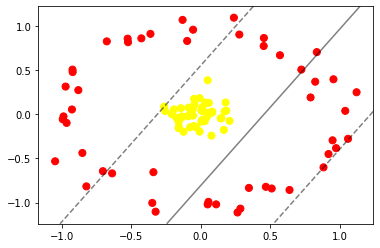

In [17]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="autumn")
plt_svc(SVC(kernel="linear").fit(x,y), plot_support=False)

**Ya vemos que separar este dataset por una recta no es posible**

**Podemos imaginar que estos puntos vienen de un dataset de una dimensión superior a 2, por ejemplo que los amarillos vienen de una altura mayor a los rojos, es decir en 3D.**

In [18]:
r = np.exp(-(x**2).sum(1))
r

array([0.31189412, 0.94737019, 0.39946913, 0.4418631 , 0.38989142,
       0.4267358 , 0.39635445, 0.32964268, 0.46029442, 0.95237223,
       0.99313299, 0.96068853, 0.97737981, 0.96488586, 0.38116213,
       0.33963092, 0.99609323, 0.40784179, 0.96994052, 0.38923374,
       0.96833254, 0.982668  , 0.99210263, 0.98655556, 0.42217023,
       0.99822814, 0.97768423, 0.40204399, 0.37938471, 0.37168377,
       0.26599425, 0.97974133, 0.96225928, 0.40816929, 0.2936527 ,
       0.35135289, 0.99236577, 0.3719313 , 0.36283464, 0.26627293,
       0.3965854 , 0.31816872, 0.42533463, 0.34205473, 0.96731217,
       0.28375536, 0.99249079, 0.9808347 , 0.9949791 , 0.96681563,
       0.2510558 , 0.26993426, 0.98395875, 0.92608939, 0.99128529,
       0.85884818, 0.49521669, 0.93759992, 0.31846289, 0.37202522,
       0.95081994, 0.99833095, 0.3482954 , 0.37678179, 0.30019574,
       0.38378405, 0.44636139, 0.35156102, 0.97800619, 0.97497537,
       0.33766469, 0.99712149, 0.4414756 , 0.57918413, 0.99300

In [19]:
from mpl_toolkits import mplot3d

In [23]:
def plot_3D(x=x, y=y,r=r,elev=30, azim=30):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(x[:,0],x[:,1],r,c=y,s=50,cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")

In [28]:
interact(plot_3D,x=fixed(x),y=fixed(y),r=fixed(r),elev=[-90,-60,-30,0,30,60,90],azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180])

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(x=array([[-0.13035871,  1.07149341],
       [-0.12330154, -0.1971347 ],
       [-0.85187954, -0.43808679],
       [ 0.34741688, -0.83430012],
       [-0.96564541, -0.09703577],
       [-0.88097525,  0.27472315],
       [-0.42715297,  0.86196679],
       [-0.92313559,  0.50751028],
       [ 0.57103677,  0.67067574],
       [ 0.20812072, -0.07406139],
       [ 0.00574717, -0.08281103],
       [-0.19239534,  0.05557935],
       [ 0.14416643, -0.04578198],
       [ 0.18457065,  0.04097727],
       [-0.36167424,  0.91308389],
       [-0.92189681,  0.47958531],
       [ 0.0126873 , -0.06126544],
       [ 0.2782838 ,  0.90522598],
       [ 0.1715844 ,  0.03285307],
       [-0.52318716,  0.81844392],
       [-0.17523665, -0.03836446],
       [-0.12915715, -0.02832646],
       [ 0.08357503,  0.03072351],
       [-0.087776  ,  0.07636101],
       [-0.92698226,  0.05523177],
       [ 0.00584224,  0.04170487],
       [-0.030931  , -0.14700956],
       [-0.70404114, -0.64

In [29]:
rbf = SVC(kernel="rbf", C=1e10) #RBF= RADIAL BASIS FUNCTION
rbf.fit(x,y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

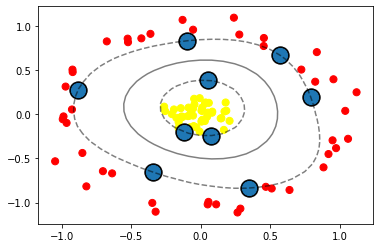

In [33]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="autumn")  ##pintamos solo los pts
plt_svc(rbf)                                       ##pintamos los contornos y los puntos que tocan estos
plt.scatter(rbf.support_vectors_[:,0],rbf.support_vectors_[:,1],s=200, lw=1,facecolors=None)  #cambiamos el color de los pts

**Ahora si funciono, es recomendable ver todos los tipos de kernels que tendremos**

## Ajustar los parámetros de SVM

In [37]:
x,y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)

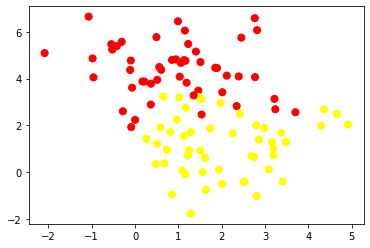

In [38]:
plt.scatter(x[:,0],x[:,1],c=y, s=50, cmap="autumn")

**En este tipo de datos más uniformes, será imposible con linear o con rbf o cualquier polinomio ajustar un SVM, para ello necesitamos relajar las condiciones de margen**

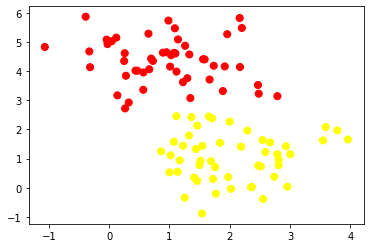

In [41]:
x,y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(x[:,0],x[:,1],c=y, s=50, cmap="autumn")

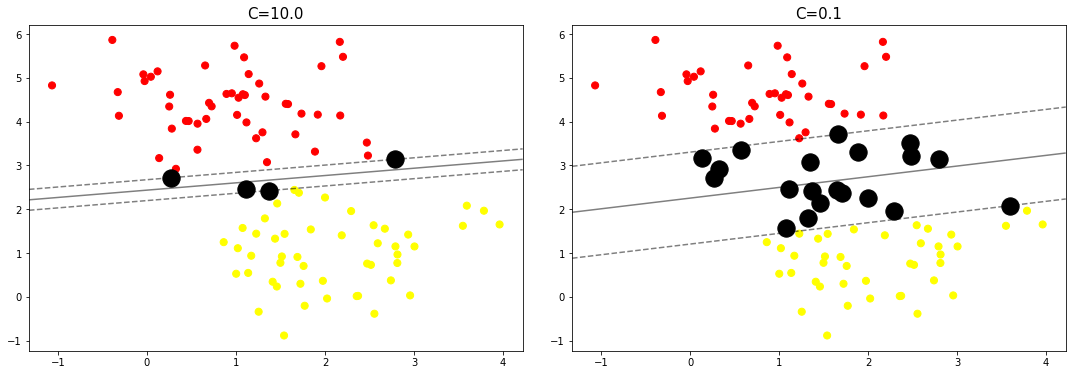

In [44]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.1)

for ax_i, C in  zip(ax, [10,0.1]):
    model = SVC(kernel="linear",C=C)
    model.fit(x,y)
    ax_i.scatter(x[:,0],x[:,1],c=y, s=50,cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C={0:.1f}".format(C),size=15)


**Vemos que a medida que disminuimos el C se hace más flexible el tener elementos dentro del pasillo,  el C optimo lo tendremos que buscar ya que será propio de cada dataset y quizas haya que utilizar una validación cruzada para generar esto.**